In [2]:
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
from stability_selection import StabilitySelection
import warnings
warnings.filterwarnings('ignore')

def _generate_dummy_classification_data(p=1000, n=1000, k=5, random_state=123321):

    rng = check_random_state(random_state)

    X = rng.normal(loc=0.0, scale=1.0, size=(n, p))
    betas = np.zeros(p)
    important_betas = np.sort(rng.choice(a=np.arange(p), size=k))
    betas[important_betas] = rng.uniform(size=k)

    probs = 1 / (1 + np.exp(-1 * np.matmul(X, betas)))
    y = (probs > 0.5).astype(int)

    return X, y, important_betas

## This is all preparation of the dummy data set
n, p, k = 500, 1000, 5

X, y, important_betas = _generate_dummy_classification_data(n=n, k=k)
base_estimator = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(penalty='l2'))
])

## Here stability selection is instantiated and run
selector = StabilitySelection(base_estimator=base_estimator, lambda_name='model__C',
                              lambda_grid=np.logspace(-5, -1, 50)).fit(X, y)

print(selector.get_support(indices=True))

[  8  10  17  20  24  27  30  33  37  38  42  44  49  51  52  53  58  59
  63  64  69  70  71  72  73  78  81  85  95  97  98 103 112 118 120 121
 127 129 130 134 137 140 143 146 150 154 155 161 165 170 177 179 180 185
 187 191 196 197 198 200 203 204 207 209 213 222 224 227 228 230 239 240
 243 252 253 266 268 270 272 274 275 276 279 281 284 285 286 290 293 294
 295 296 299 301 303 306 309 310 311 314 315 318 321 325 326 328 333 340
 341 342 346 347 348 351 352 354 355 356 357 368 371 379 380 382 384 385
 386 389 394 395 397 402 406 410 412 421 423 424 426 432 435 436 438 440
 451 452 454 455 465 466 471 474 478 483 488 490 492 493 495 496 497 499
 503 504 512 521 523 524 525 527 529 531 541 546 548 550 553 554 556 560
 565 570 580 581 582 584 586 590 593 599 601 602 603 604 607 613 621 635
 636 647 651 652 653 654 657 658 660 667 668 669 676 680 681 685 686 689
 697 700 702 703 706 707 713 714 721 722 724 726 735 736 737 740 741 743
 746 750 752 758 770 776 781 782 784 792 798 799 80

(200, 200)
[20 30]
Fitting estimator for lambda = 20.00000 (1 / 2) on 100 bootstrap samples


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    6.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator for lambda = 30.00000 (2 / 2) on 100 bootstrap samples


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    7.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator for lambda = 20.00000 (1 / 2) on 100 bootstrap samples


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    5.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator for lambda = 30.00000 (2 / 2) on 100 bootstrap samples


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    8.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator for lambda = 20.00000 (1 / 2) on 100 bootstrap samples


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    5.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator for lambda = 30.00000 (2 / 2) on 100 bootstrap samples


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    8.6s finished


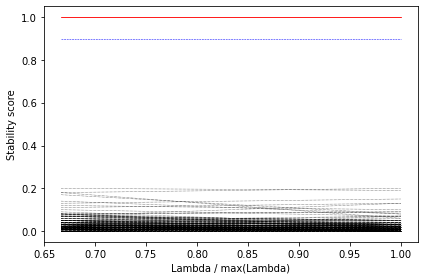

In [16]:
import numpy as np

from sklearn.utils import check_random_state
from stability_selection import StabilitySelection, RandomizedLasso, plot_stability_path
from sklearn.ensemble import RandomForestRegressor

def generate_experiment_data(n=200, p=200, rho=0.6, random_state=3245):
    rng = check_random_state(random_state)

    sigma = np.eye(p)
    sigma[0, 2] = rho
    sigma[2, 0] = rho
    sigma[1, 2] = rho
    sigma[2, 1] = rho

    X = rng.multivariate_normal(mean=np.zeros(p), cov=sigma, size=(n,))
    beta = np.zeros(p)
    beta[:2] = 1.0
    epsilon = rng.normal(0.0, 0.25, size=(n,))

    y = np.matmul(X, beta) + epsilon

    return X, y



n, p = 200,100
rho = 0.6

X, y = generate_experiment_data()
print(X.shape)
lambda_grid = np.arange(20,35,step=10)
print(lambda_grid)

for weakness in [0.2, 0.5, 1.0]:
    estimator = RandomForestRegressor(n_estimators=10,n_jobs=4)
    #RandomizedLasso(weakness=weakness)
    selector = StabilitySelection(base_estimator=estimator, lambda_name='n_estimators',
                                      lambda_grid=lambda_grid, threshold=0.9, verbose=1)
    selector.fit(X, y)

fig, ax = plot_stability_path(selector)
fig.show()

Selected variables are:
-----------------------
Variable 1: [325], score 0.640
Variable 2: [495], score 1.000
Variable 3: [524], score 0.980
Variable 4: [647], score 0.690


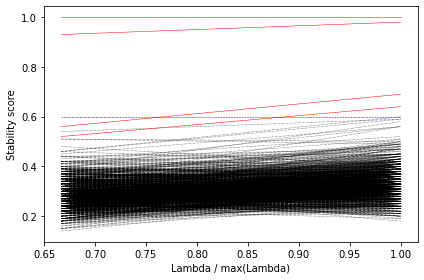

In [17]:
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
from stability_selection import StabilitySelection, plot_stability_path
from sklearn.ensemble import RandomForestClassifier

def _generate_dummy_classification_data(p=1000, n=1000, k=5, random_state=123321):

    rng = check_random_state(random_state)

    X = rng.normal(loc=0.0, scale=1.0, size=(n, p))
    betas = np.zeros(p)
    important_betas = np.sort(rng.choice(a=np.arange(p), size=k))
    betas[important_betas] = rng.uniform(size=k)

    probs = 1 / (1 + np.exp(-1 * np.matmul(X, betas)))
    y = (probs > 0.5).astype(int)

    return X, y, important_betas


n, p, k = 500, 100, 5

X, y, important_betas = _generate_dummy_classification_data(n=n, k=k)

base_estimator = Pipeline([
    ('model', RandomForestClassifier(n_estimators=10,n_jobs=4))])
selector = StabilitySelection(base_estimator=base_estimator, lambda_name='model__n_estimators',
                              lambda_grid=np.arange(20,35,step=10))
selector.fit(X, y)

fig, ax = plot_stability_path(selector)
fig.show()

selected_variables = selector.get_support(indices=True)
selected_scores = selector.stability_scores_.max(axis=1)

print('Selected variables are:')
print('-----------------------')

for idx, (variable, score) in enumerate(zip(selected_variables, selected_scores[selected_variables])):
    print('Variable %d: [%d], score %.3f' % (idx + 1, variable, score))